# Mengumpulkan data

data iris pada database postgreSQL

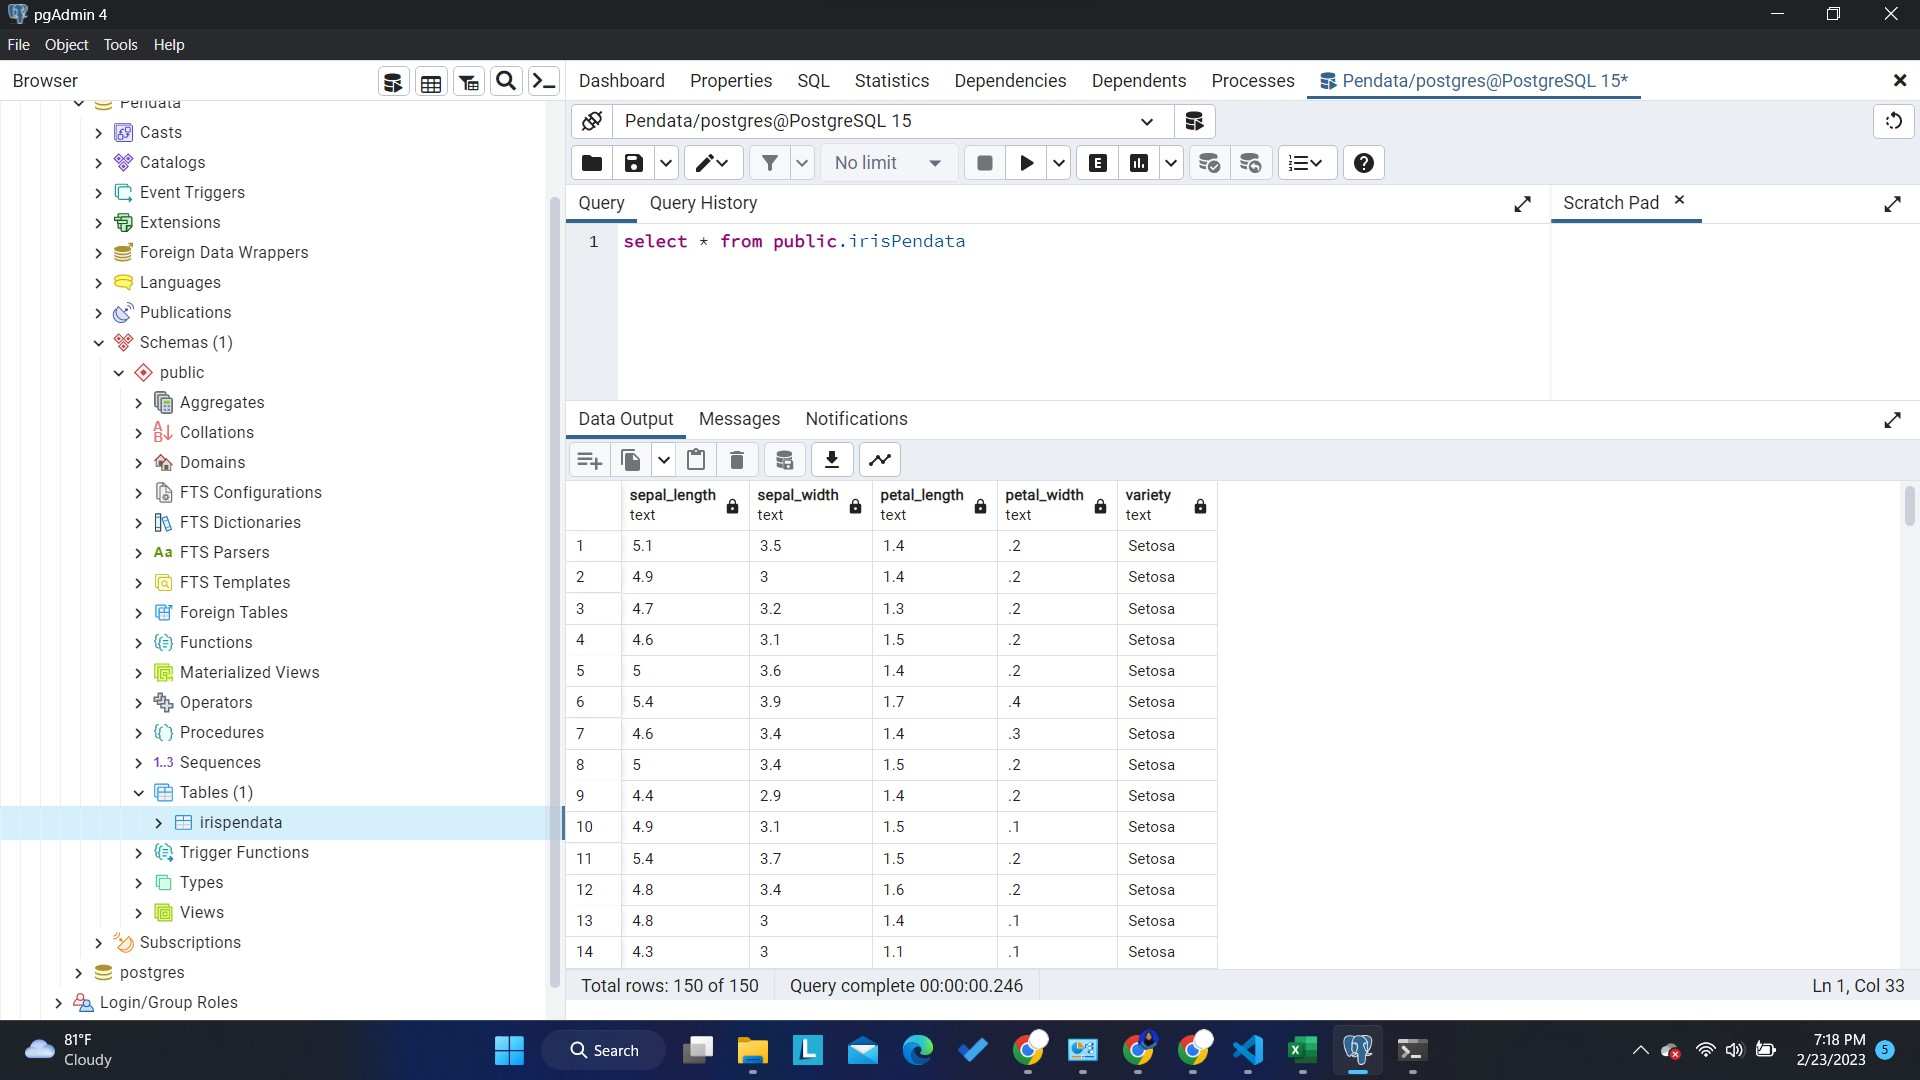

In [18]:
!pip install psycopg2

In [19]:
!pip install pandas

Mengkoneksikan Database postgreSQL 

In [27]:
import psycopg2
import pandas as pd
# Connection parameters, yours will be different
param_dic = {
    "host"      : "localhost",
    "database"  : "Pendata",
    "user"      : "postgres",
    "password"  : "bismiLLAH"
}
def connect(params_dic):
    """ Connect to the PostgreSQL database server """
    conn = None
    try:
        # connect to the PostgreSQL server
        print('Connecting to the PostgreSQL database...')
        conn = psycopg2.connect(**params_dic)
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        sys.exit(1) 
    print("Connection successful")
    return conn

In [20]:
def postgresql_to_dataframe(conn, select_query, column_names):
    """
    Tranform a SELECT query into a pandas dataframe
    """
    cursor = conn.cursor()
    try:
        cursor.execute(select_query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    
    # Naturally we get a list of tupples
    tupples = cursor.fetchall()
    cursor.close()
    
    # We just need to turn it into a pandas dataframe
    df = pd.DataFrame(tupples, columns=column_names)
    return df

Menampilkan dataframe database

In [28]:
# Connect to the database
conn = connect(param_dic)

column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width","variety"]
# Execute the "SELECT *" query
df = postgresql_to_dataframe(conn, "select * from irispendata", column_names)
df.head()

Connecting to the PostgreSQL database...
Connection successful


,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,.2,Setosa
1,4.9,3,1.4,.2,Setosa
2,4.7,3.2,1.3,.2,Setosa
3,4.6,3.1,1.5,.2,Setosa
4,5,3.6,1.4,.2,Setosa
